# Tarea 1.  Optimización

## Oscar Esaú Peralta Rosales

1. Sea $f_1(x_1, x_2) =  x_1^2 - x_2^2$, $f_2(x_1, x_2) =  2x_1x_2$. Representa los conjuntos de nivel asociados con $f_1(x_1, x_2) = 12$ y $f_2(x_1, x_2) = 16$ en la misma gráfica usando python. Indica sobre la gráfica, los puntos $x = [x_1, x_2]^T$ para los cuales $f(x) = [f_1(x_1,x_2), f_2(x_1, x_2)]^T = [12, 16]^T$.

**Solución:**
Importamos las librerías necesarias

In [8]:
from typing import Callable, Tuple

import numpy as np
import matplotlib.pyplot as plt

from shapely import geometry

In [13]:
def f1(X1:np.array, X2:np.array) -> np.array:
    """ Returns a a np.array with the values of the operation f(X1, X2) = X1^2 - X2^2 """
    return X1**2 - X2**2


def f2(X1:np.array, X2:np.array) -> np.array:
    """ Returns a a np.array with the values of the operation f(X1, X2) = 2 * X1 * X2 """
    return 2 * X1 * X2


def make_data_grid(funct:Callable[[], np.array], start:float=-20, end:float=20, size:int=30) -> Tuple:
    """ Compute the contour params """
    x = np.linspace(start, end, size)
    y = np.linspace(start, end, size)
    X1, X2 = np.meshgrid(x, y)
    return X1, X2, funct(X1, X2)


def find_intersection(contour1, contour2):
    """ Find the intersection from two contours """
    v1 = contour1.collections[0].get_paths()[0].vertices
    v2 = contour2.collections[0].get_paths()[0].vertices
    p1 = geometry.LineString(v1)
    p2 = geometry.LineString(v2)
    intersection = p1.intersection(p2)
    return intersection


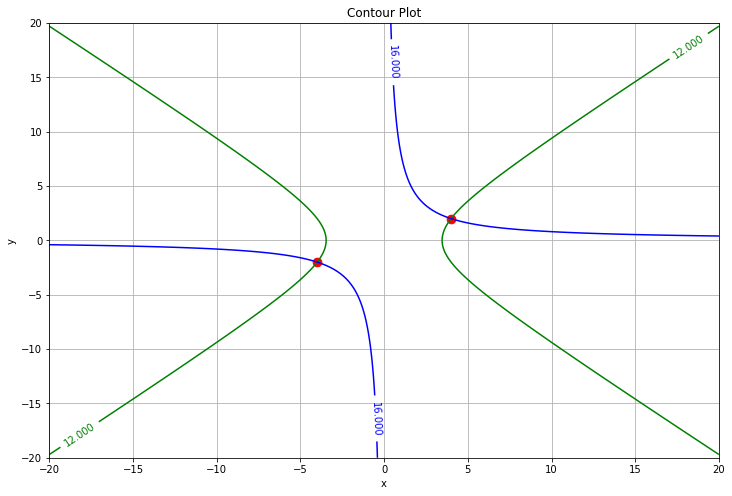

In [14]:
# Configuraciones para la figura
plt.figure(figsize=(12, 8))
plt.title('Contour Plot')

# Dibujamos los dos contornos para las funciones f1 y f2
c1 = plt.contour(*make_data_grid(f1, start=-20, end=20, size=200), levels=[12], colors='g')
c2 = plt.contour(*make_data_grid(f2, start=-20, end=20, size=200), levels=[16], colors='b')

# Encontramos las coordenadas de intersección
x_coords, y_coords = zip(*find_intersection(c2,c1).coords)
x_coords = [x_coords[0], -x_coords[0]]
y_coords = [y_coords[0], -y_coords[0]]
# Dibujamos los puntos de intersección
plt.scatter(x_coords, y_coords, marker='.', color='r', s=300)

plt.clabel(c2, inline=True, fontsize=10)
plt.clabel(c1, inline=True, fontsize=10)
plt.grid(True)

plt.xlabel('x')
plt.ylabel('y')
plt.show()